# SuperGlue Alignment of Single Image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import jupyter_compare_view

Jupyter compare_view v0.2.4


In [2]:
path = '2021-11-15_22-54-45/output/2021-11-15_22-54-45_im_ir_2021-11-15_22-54-45_im_vis_matches.npz'
npz = np.load(path)

In [3]:
print(npz.files)
print(npz['keypoints0'].shape)
print(npz['keypoints1'].shape)
print(npz['matches'].shape)
print(np.sum(npz['matches']>-1))
print(npz['match_confidence'].shape)

['keypoints0', 'keypoints1', 'matches', 'match_confidence']
(2048, 2)
(2048, 2)
(2048,)
686
(2048,)


In [6]:
best_idx = npz['match_confidence'] > 0.90
best_kpt0 = npz['keypoints0'][best_idx]
best_kpt1 = []
for i, idx in enumerate(best_idx):
    if idx:
        if npz['matches'][i] == -1:
            print("WTF HAPPENED HERE")
        best_kpt1.append(npz['keypoints1'][npz['matches'][i]])
best_kpt1 = np.array(best_kpt1)

In [7]:
npz['keypoints1'][npz['matches'][0]]

array([ 951., 1774.], dtype=float32)

In [8]:
best_kpt0.shape

(528, 2)

In [9]:
best_kpt1.shape

(528, 2)

In [11]:
im_vis = cv2.imread('2021-11-15_22-54-45/2021-11-15_22-54-45_im_vis.jpg')
im_ir = cv2.imread('2021-11-15_22-54-45/2021-11-15_22-54-45_im_ir.jpg')

In [12]:
assert not np.array_equal(best_kpt0, best_kpt1)

In [13]:
for kp0, kp1 in zip(best_kpt0, best_kpt1):
    print("Keypoints:", kp0, kp1)

Keypoints: [1081. 1681.] [ 951. 1774.]
Keypoints: [1909. 1960.] [1820. 2013.]
Keypoints: [1746. 2201.] [1665. 2268.]
Keypoints: [ 828. 1920.] [ 698. 2032.]
Keypoints: [ 861. 1742.] [ 729. 1847.]
Keypoints: [ 720. 1956.] [ 588. 2076.]
Keypoints: [ 726. 1916.] [ 593. 2033.]
Keypoints: [1839. 1722.] [1713. 1776.]
Keypoints: [1017. 1782.] [ 889. 1881.]
Keypoints: [1778. 1950.] [1685. 2012.]
Keypoints: [2115. 2075.] [2027. 2119.]
Keypoints: [ 773. 1911.] [ 632. 2022.]
Keypoints: [ 750. 1955.] [ 619. 2073.]
Keypoints: [ 756. 1947.] [ 625. 2064.]
Keypoints: [ 935. 1890.] [ 807. 1998.]
Keypoints: [1454. 1681.] [1351. 1753.]
Keypoints: [1128. 1771.] [1003. 1862.]
Keypoints: [2119. 1688.] [1982. 1725.]
Keypoints: [ 847. 1746.] [ 714. 1852.]
Keypoints: [1811. 1952.] [1721. 2011.]
Keypoints: [ 893. 1940.] [ 767. 2050.]
Keypoints: [2430. 2264.] [2347. 2293.]
Keypoints: [ 870. 1727.] [ 736. 1830.]
Keypoints: [ 749. 1895.] [ 611. 2009.]
Keypoints: [2007. 2109.] [1914. 2159.]
Keypoints: [2033. 1774.] 

In [14]:
(H, mask) = cv2.findHomography(best_kpt0, best_kpt1, method=cv2.RANSAC)
(h, w) = im_vis.shape[:2]


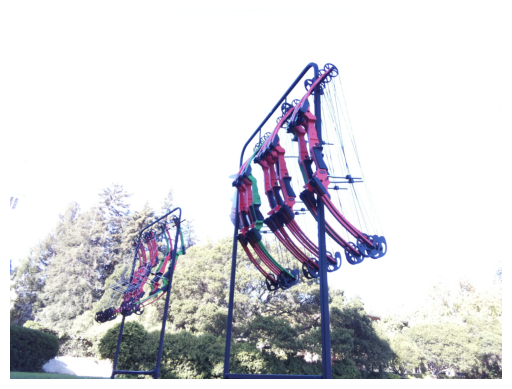
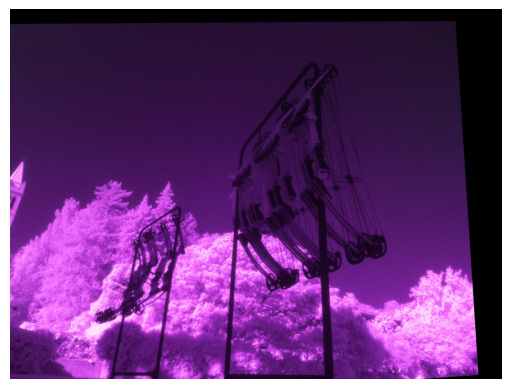

In [17]:
%%compare
fig, ax1 = plt.subplots()
ax1.axis("off")
ax1.imshow(cv2.cvtColor(im_vis, cv2.COLOR_BGR2RGB))

# Align and convert the 
fig, ax2 = plt.subplots()
ax2.axis("off")
im_aligned = cv2.warpPerspective(im_ir, H, (w, h))
ax2.imshow(cv2.cvtColor(im_aligned, cv2.COLOR_BGR2RGB))